In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/franj/notebooks/mrt/data/cleaned_ridership_data.csv')
df

,Date,January,February,March,April,May,June,July,August,September,October,November,December,Year
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,27,433980.0,435284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
833,28,455919.0,442730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
834,29,272666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
835,30,443303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025


## Step 1: Data Understanding
1. Dataframe shape
2. head and tail
3. dtypes
4. describe

In [4]:
# dataset in wide format, convert to long format
df_melted = df.melt(id_vars=['Date', 'Year'], 
                     var_name='Month', 
                     value_name='Ridership')

In [5]:
import calendar

# Map month names to numbers
df_melted['Month'] = df_melted['Month'].map(lambda x: list(calendar.month_name).index(x))

In [6]:
df_melted.tail()

,Date,Year,Month,Ridership
10039,27,2025,12,0.0
10040,28,2025,12,0.0
10041,29,2025,12,0.0
10042,30,2025,12,0.0
10043,31,2025,12,0.0


In [7]:
df_melted.shape

(10044, 4)

In [8]:
df_melted.columns

Index(['Date', 'Year', 'Month', 'Ridership'], dtype='object')

In [9]:
df_melted.dtypes

Date           int64
Year           int64
Month          int64
Ridership    float64
dtype: object

In [10]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10044 non-null  int64  
 1   Year       10044 non-null  int64  
 2   Month      10044 non-null  int64  
 3   Ridership  10044 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 314.0 KB


In [11]:
df_melted.describe()

,Date,Year,Month,Ridership
count,10044.000000,10044.000000,10044.000000,10044.000000
mean,16.000000,2012.000000,6.500000,304980.181178
std,8.944717,7.789269,3.452224,164784.004977
min,1.000000,1999.000000,1.000000,0.000000
25%,8.000000,2005.000000,3.750000,194206.250000
50%,16.000000,2012.000000,6.500000,328775.500000
75%,24.000000,2019.000000,9.250000,434028.000000
max,31.000000,2025.000000,12.000000,622880.000000


## Step 3: Feature Understanding

(Univariate analysis)

1. Plotting Feature Distributions
    
    1.1. Histogram
    
    1.2. KDE
    
    1.3. Boxplot

Average Daily Ridership

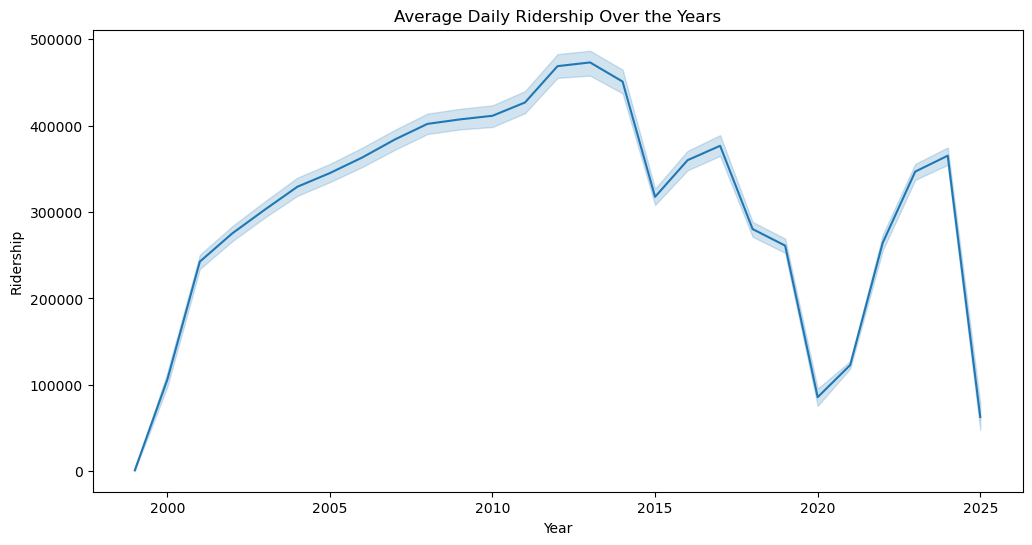

In [12]:
# yearly trends
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_melted, x ='Year', y ='Ridership')
plt.title('Average Daily Ridership Over the Years')
plt.xlabel('Year')
plt.ylabel('Ridership')

plt.show()

Year-Over-Year Growth Rate by Month

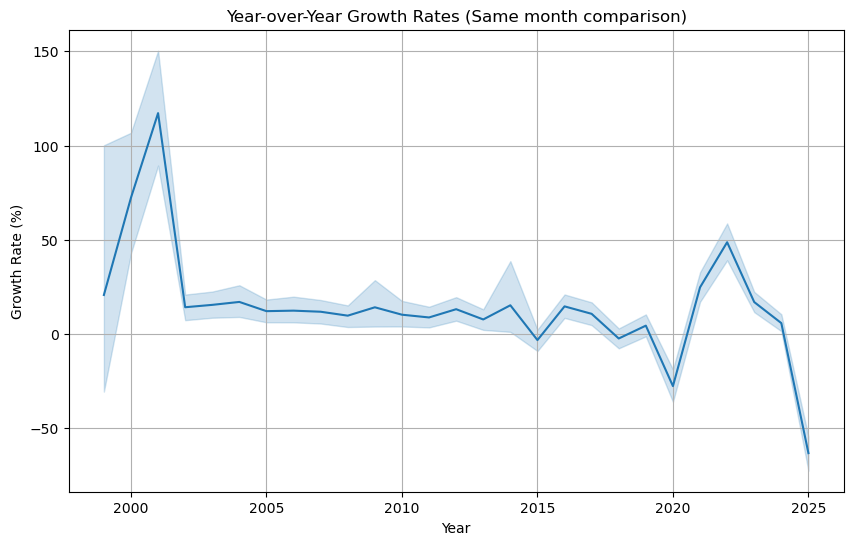

In [13]:
# Group by month and year, then calculate YoY growth
df_grouped = df_melted.groupby(['Month']).apply(
    lambda x: x.assign(YoY_growth = (x['Ridership'].pct_change(periods = 12) * 100))
)

# Plot the corrected growth rates
plt.figure(figsize = (10, 6))
sns.lineplot(data = df_grouped, x ='Year', y ='YoY_growth')
plt.title('Year-over-Year Growth Rates (Same month comparison)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)

plt.show()

Year-Over-Year Growth Rate by Yearly Total

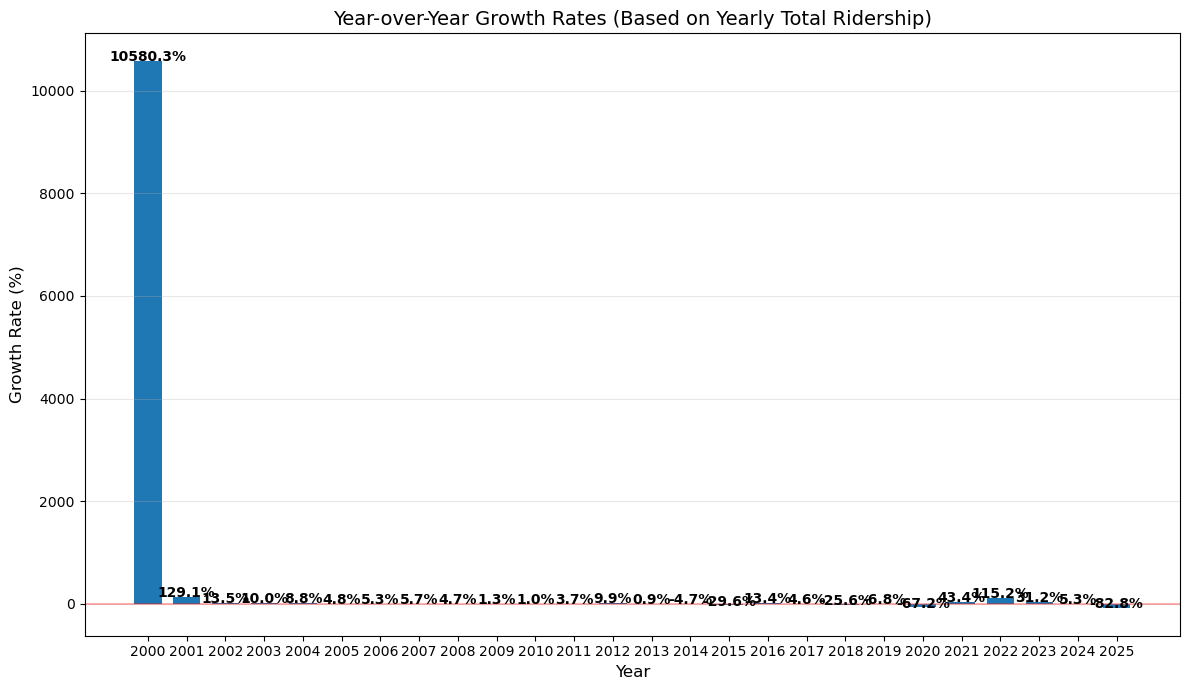

    Year     Ridership    YoY_growth
1   2000  3.940146e+07  10580.335090
2   2001  9.026215e+07    129.083228
3   2002  1.024436e+08     13.495597
4   2003  1.126475e+08      9.960518
5   2004  1.225122e+08      8.757138
6   2005  1.284013e+08      4.806994
7   2006  1.351512e+08      5.256830
8   2007  1.428861e+08      5.723144
9   2008  1.495856e+08      4.688705
10  2009  1.515218e+08      1.294377
11  2010  1.530788e+08      1.027579
12  2011  1.588060e+08      3.741393
13  2012  1.744541e+08      9.853590
14  2013  1.760583e+08      0.919515
15  2014  1.678183e+08     -4.680235
16  2015  1.181605e+08    -29.590244
17  2016  1.339529e+08     13.365221
18  2017  1.401522e+08      4.627949
19  2018  1.042754e+08    -25.598463
20  2019  9.715010e+07     -6.833125
21  2020  3.187417e+07    -67.190803
22  2021  4.569191e+07     43.350932
23  2022  9.833068e+07    115.203686
24  2023  1.290302e+08     31.220647
25  2024  1.358853e+08      5.312849
26  2025  2.332051e+07    -82.838096


In [14]:
# Calculate yearly totals
yearly_totals = df_melted.groupby('Year')['Ridership'].sum().reset_index()

# Calculate YoY growth rates
yearly_totals['YoY_growth'] = yearly_totals['Ridership'].pct_change() * 100

# Drop the first row which will have NaN for growth rate
yearly_totals = yearly_totals.dropna()

# Create the plot
plt.figure(figsize = (12, 7))
bars = plt.bar(yearly_totals['Year'], yearly_totals['YoY_growth'], width = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '-', alpha = 0.3)
plt.title('Year-over-Year Growth Rates (Based on Yearly Total Ridership)', fontsize = 14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, axis = 'y', alpha = 0.3)

# Add data labels above/below each bar with improved positioning
for bar, year, growth in zip(bars, yearly_totals['Year'], yearly_totals['YoY_growth']):
    # Position labels above positive bars and below negative bars
    # with more spacing to avoid overlap
    offset = 1.5 if growth > 0 else -2
    plt.text(
        year, 
        growth + offset, 
        f"{growth:.1f}%", 
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Adjust y-axis limits to make room for labels
y_min, y_max = plt.ylim()
plt.ylim(y_min - 3, y_max + 3)

# Ensure x-ticks are set to years
plt.xticks(yearly_totals['Year'])

plt.tight_layout()
plt.show()

# Print the yearly totals for reference
print(yearly_totals)

Ridership by Day in a Specific Year

In [1]:
# visualize daily ridership
def plot_monthly_ridership(df_melted, year, month):
    # Filter dataset for the selected year and month
    subset = df_melted[(df_melted["Year"] == year) & (df_melted["Month"] == month)]

    # Sort by Date to ensure proper order
    subset = subset.sort_values(by="Date")

    plt.figure(figsize=(10, 5))
    plt.plot(subset["Date"], subset["Ridership"], marker="o", linestyle="-", label=f"{year}-{month:02d}")

    plt.xlabel("Day of the Month")
    plt.ylabel("Ridership")
    plt.title(f"Ridership Trend for {year}-{month:02d}")
    plt.xticks(subset["Date"])  # Show each day on x-axis
    plt.legend()
    plt.grid(True)
    
    plt.show()

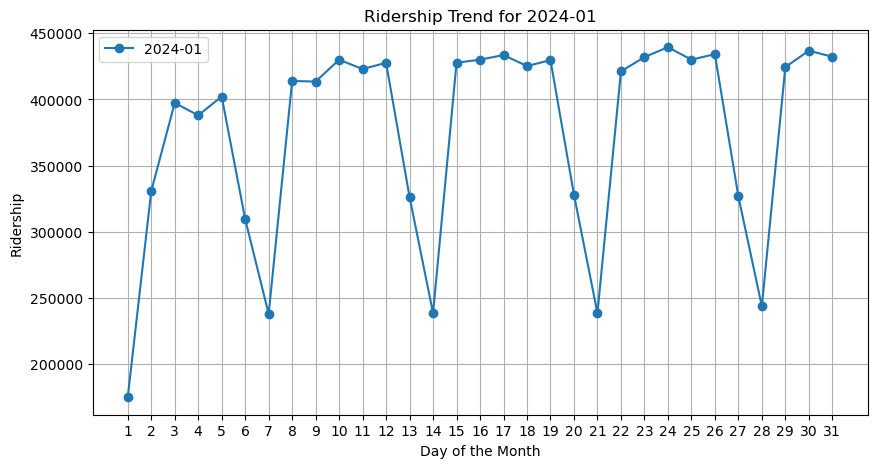

1


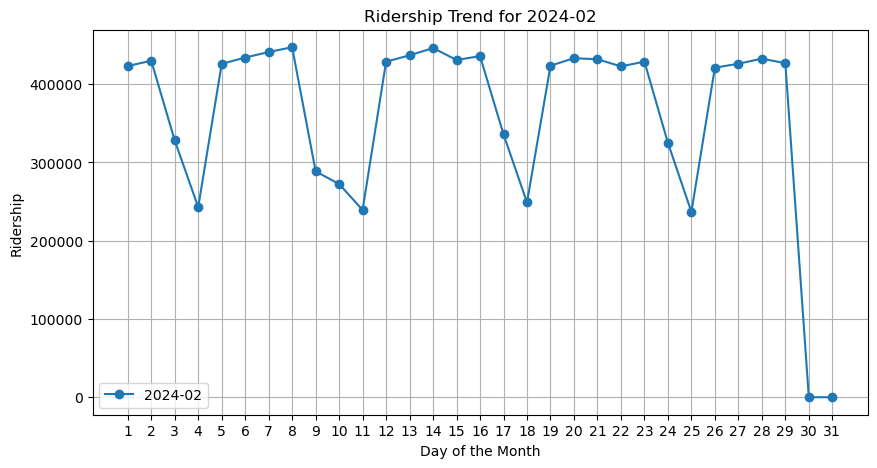

2


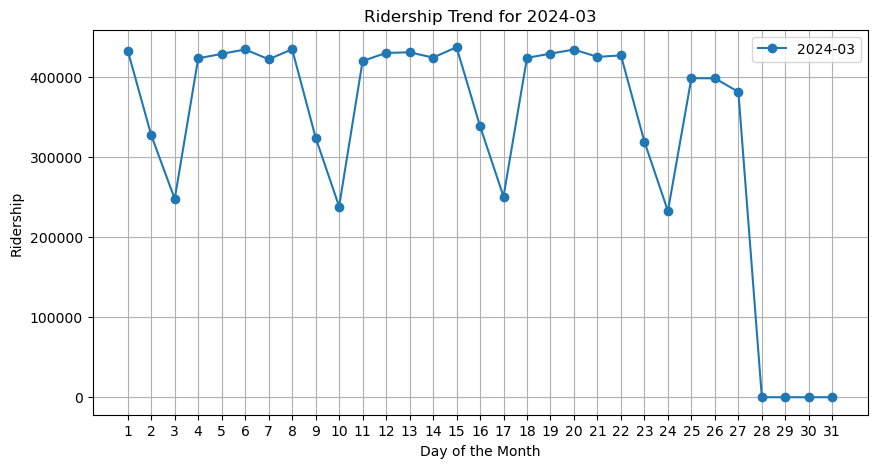

3


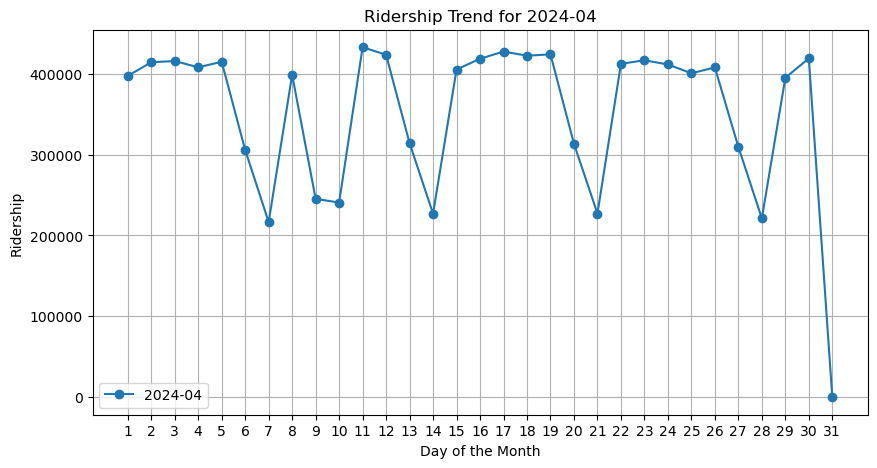

4


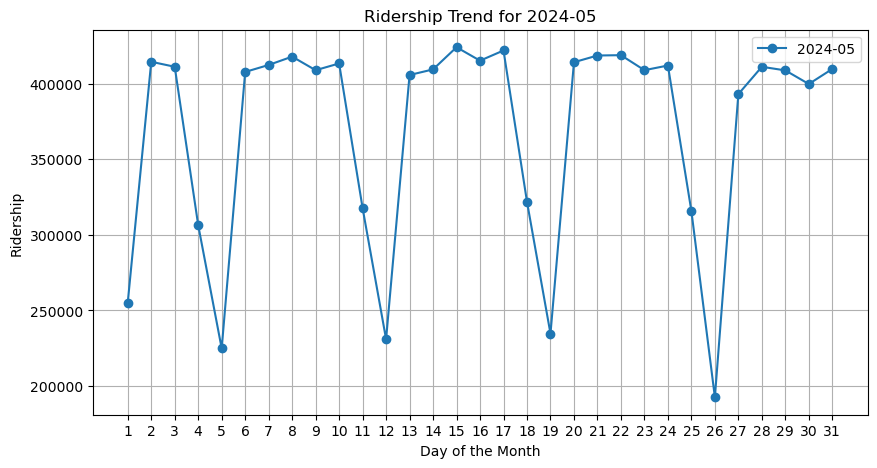

5


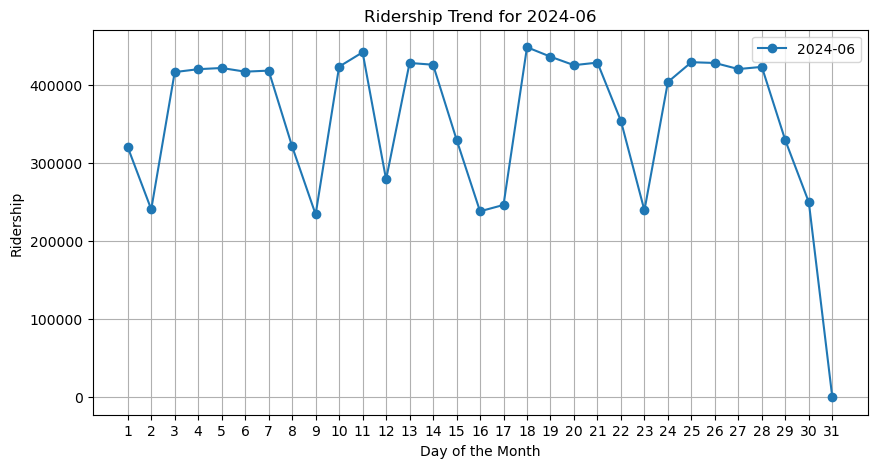

6


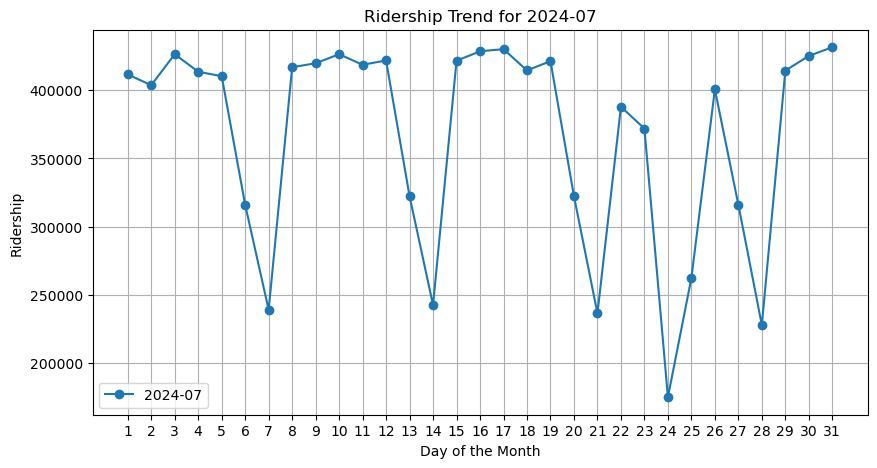

7


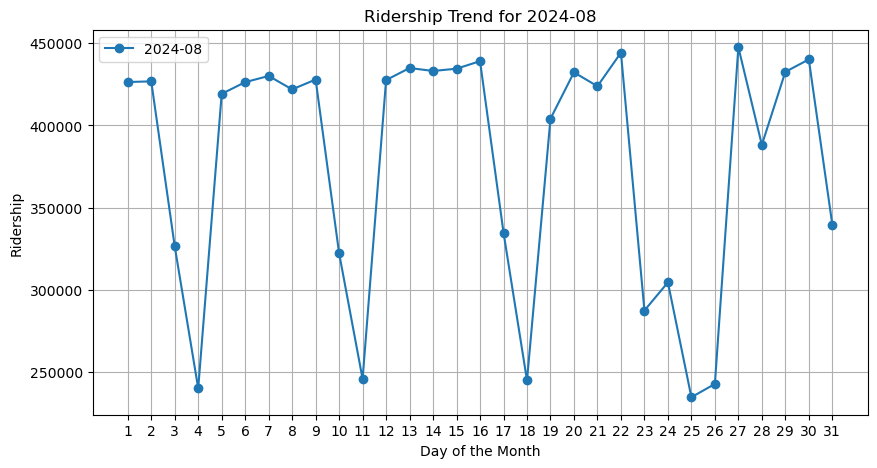

8


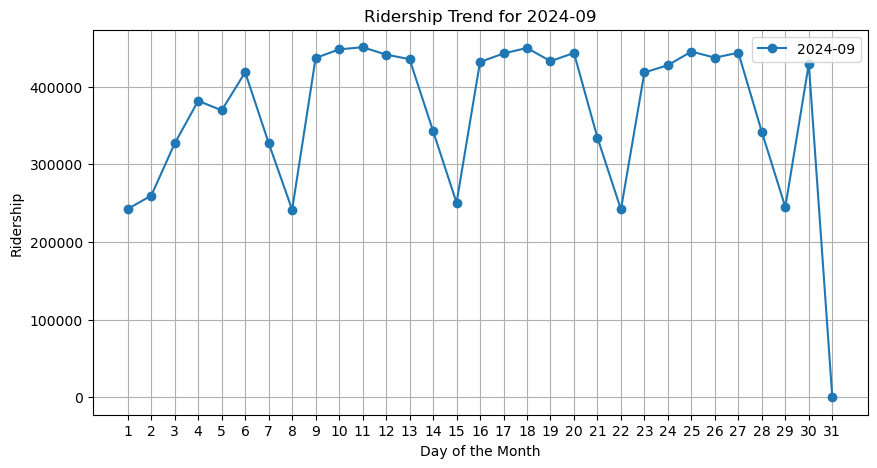

9


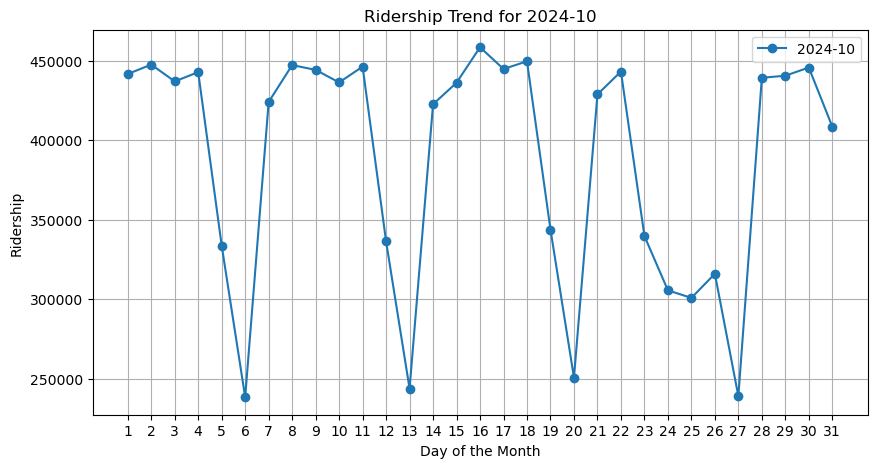

10


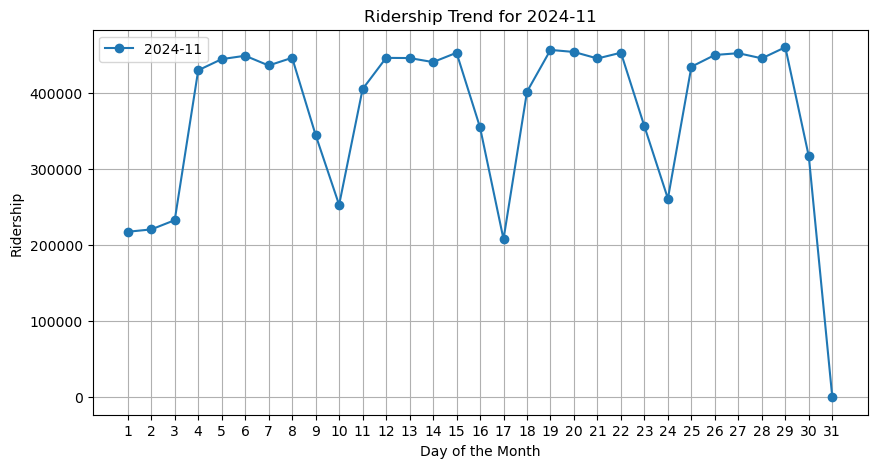

11


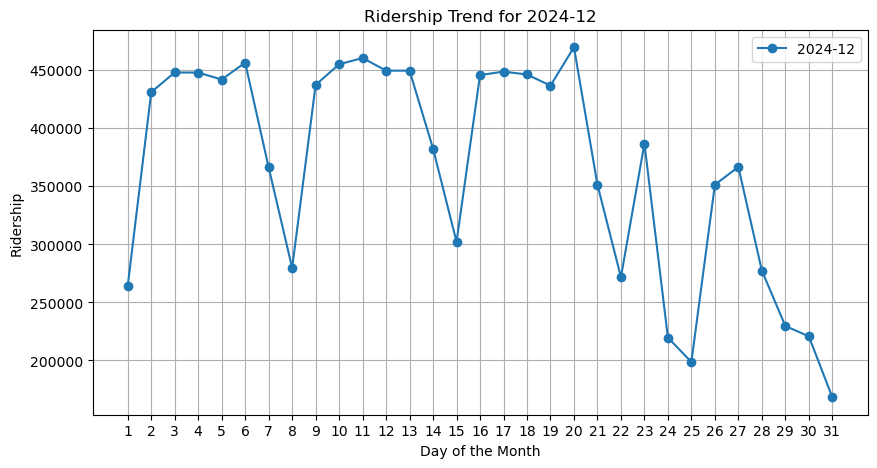

12


In [16]:
# for loop showing all months of the year 2024
for month in range(1, 13):
    plot_monthly_ridership(df_melted, 2024, month)
    print(month)

Maximum and Minimum Ridership

In [17]:
df_melted[df_melted["Ridership"] == df_melted["Ridership"].max()]

,Date,Year,Month,Ridership
6278,17,2012,8,622880.0


In [18]:
min_nonzero = df_melted[df_melted["Ridership"] > 0]["Ridership"].min()
df_melted[df_melted["Ridership"] == min_nonzero]

,Date,Year,Month,Ridership
53,23,2000,1,10251.0


Measures of Dispersion

In [19]:
df_melted["Ridership"].describe()

count     10044.000000
mean     304980.181178
std      164784.004977
min           0.000000
25%      194206.250000
50%      328775.500000
75%      434028.000000
max      622880.000000
Name: Ridership, dtype: float64

In [20]:
# median
df_melted["Ridership"].median()

328775.5

In [21]:
# variance
df_melted["Ridership"].var()

27153768296.370625

In [22]:
# standard deviation
df_melted["Ridership"].std()

164784.00497733578

In [23]:
# quantiles
df_melted["Ridership"].quantile([0.25, 0.5, 0.75])

0.25    194206.25
0.50    328775.50
0.75    434028.00
Name: Ridership, dtype: float64

In [24]:
# IQR
Q1 = df_melted["Ridership"].quantile(0.25)
Q3 = df_melted["Ridership"].quantile(0.75)
IQR = Q3 - Q1
IQR

239821.75

In [25]:
# Outlier thresholds using 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-165526.375, 793760.625)

In [26]:
# skewness
df_melted["Ridership"].skew()

-0.42655693022628094

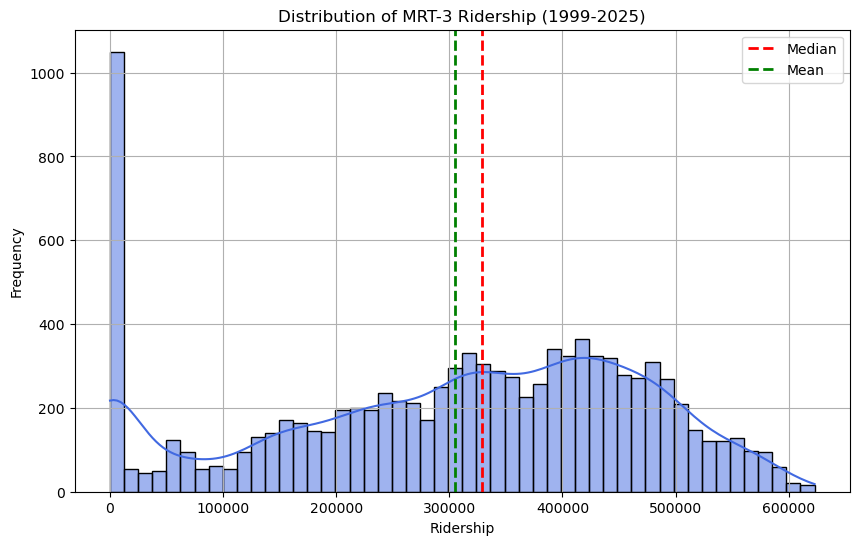

In [27]:
# Plot histogram with KDE overlay
plt.figure(figsize=(10, 6))
sns.histplot(df_melted["Ridership"], bins = 50, kde = True, color = "royalblue", edgecolor = "black")
plt.axvline(df_melted["Ridership"].median(), color='red', linestyle = 'dashed', linewidth = 2, label = "Median")
plt.axvline(df_melted["Ridership"].mean(), color='green', linestyle = 'dashed', linewidth = 2, label = "Mean")
plt.title("Distribution of MRT-3 Ridership (1999-2025)")
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.show()

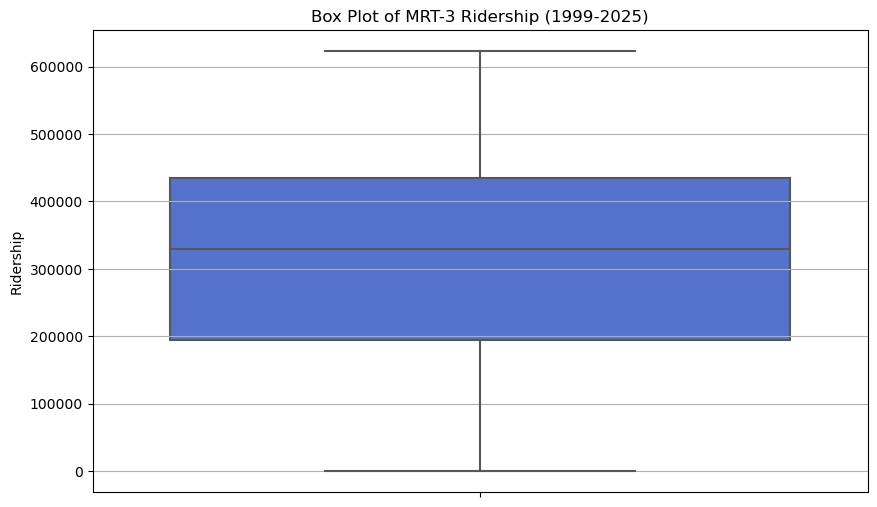

In [28]:
# Create a box plot to visualize ridership spread and outliers
plt.figure(figsize = (10, 6))
sns.boxplot(y = df_melted["Ridership"], color = "royalblue")

# Add labels and a title
plt.title("Box Plot of MRT-3 Ridership (1999-2025)")
plt.ylabel("Ridership")
plt.grid(axis = "y")

plt.show()

## Step 4: Feature Relationships

1. Scatterplot
2. Heatmap Correlation
3. Pairplot
4. Groupby comparisons

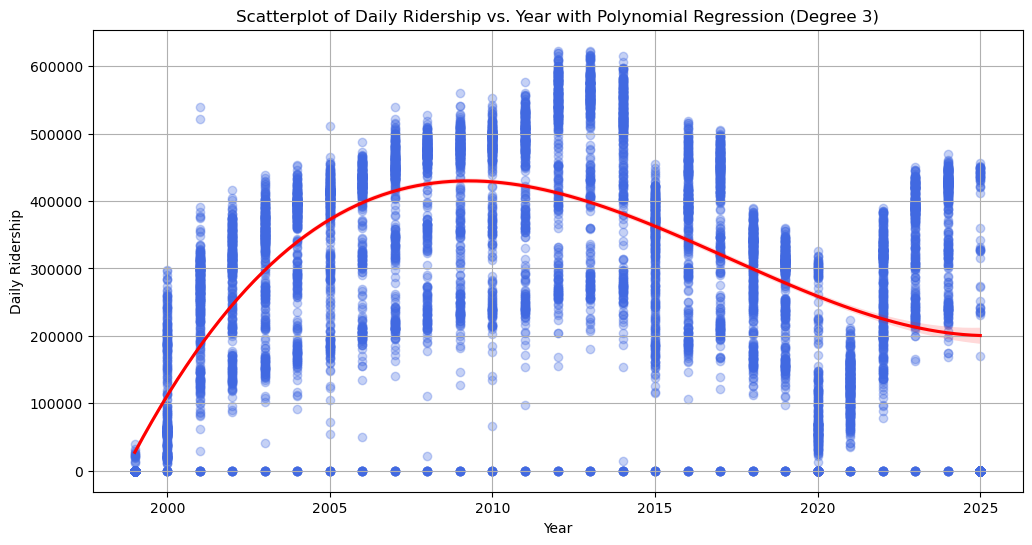

In [29]:
# Scatterplot with polynomial regression line (degree=3 for capturing nonlinear trends)
plt.figure(figsize = (12, 6))
sns.regplot(x = df_melted["Year"], y = df_melted["Ridership"], 
            scatter_kws = {"alpha": 0.3, "color": "royalblue"}, 
            line_kws = {"color": "red"}, order = 3)  # Degree 3 polynomial regression

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Daily Ridership")
plt.title("Scatterplot of Daily Ridership vs. Year with Polynomial Regression (Degree 3)")
plt.grid(True)

plt.show()

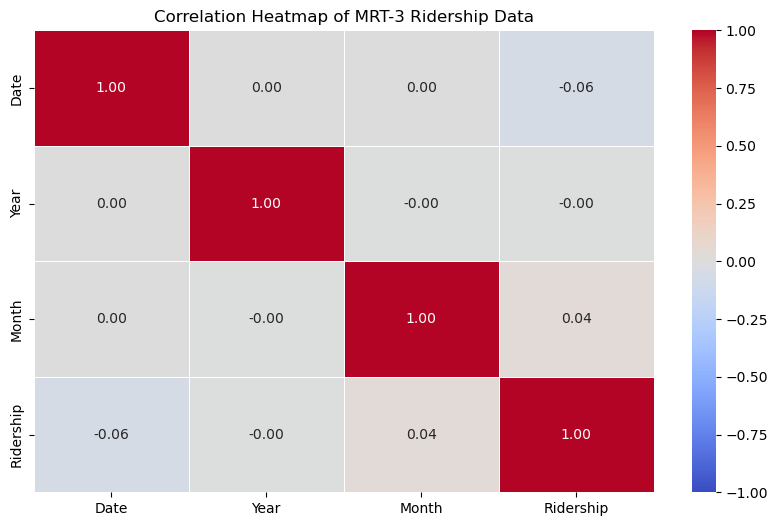

In [30]:
# Compute the correlation matrix
corr_matrix = df_melted.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot=True, fmt = ".2f", cmap="coolwarm", linewidths = 0.5, vmin = -1, vmax = 1)

# Title
plt.title("Correlation Heatmap of MRT-3 Ridership Data")
plt.show()

c:\Users\franj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


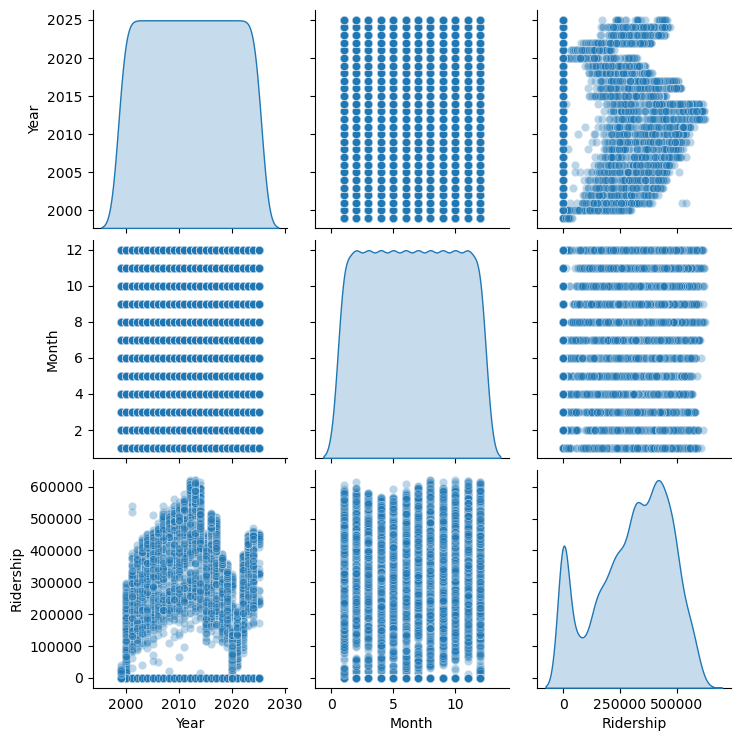

In [35]:
# Selecting relevant numerical columns
num_cols = ["Year", "Month", "Ridership"]

# Creating the pairplot
sns.pairplot(df_melted[num_cols], diag_kind="kde", plot_kws={"alpha": 0.3})

plt.show()